# Trajectory Parser Script

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

import pandas as pd
import os
import pprint
from evo.core.trajectory import PoseTrajectory3D
from evo.tools import plot
from evo.core import metrics
from evo.core import sync
from pose_trajectory_evaluation import PoseTrajectoryEvaluation

%reload_ext autoreload
%autoreload 2

In [38]:
# export_server_path = '/home/berlukas/Documents/results/finals_v2/processed/'
# export_server_path = '/tmp/maplab_node/anymal_4/mission_1651067930390278348/submap_4/'
export_server_path = '/mnt/data/datasets/alice/finals/submaps/anymal_4/mission_1650952101041418929/submap_0/'
# export_server_path = '/mnt/data/datasets/alice/finals/submaps/anymal_1/mission_1650887347300180121/submap_2/'
# export_server_path = '/home/berlukas/Documents/results/finals_map_pr24_pr125_f1245/'

csv_file = 'vertex_poses_velocities_biases.csv'
server_trajectories = []
eval = PoseTrajectoryEvaluation()

anymal_1_ms = 'ed1e9dad4b21e9161100000000000000'
anymal_2_ms = '2c6134369b24e9161100000000000000'
anymal_4_ms = '5491be55305ce9161100000000000000'
# anymal_4_ms = '32cb0f1897f1b4160f00000000000000'
anymal_5_ms = '7b3227a744fbe2161100000000000000'

# server_df = eval.get_mission_from_csv(export_server_path + csv_file, anymal_1_ms)
# server_trajectories.append(eval.convert_df_to_traj(server_df))

# server_df = eval.get_mission_from_csv(export_server_path + csv_file, anymal_2_ms)
# server_trajectories.append(eval.convert_df_to_traj(server_df))

server_df = eval.get_mission_from_csv(export_server_path + csv_file, anymal_4_ms)
server_trajectories.append(eval.convert_df_to_traj(server_df))

# server_df = eval.get_mission_from_csv(export_server_path + csv_file, anymal_5_ms)
# server_trajectories.append(eval.convert_df_to_traj(server_df))

In [80]:
export_server_path = '/home/berlukas/Downloads/darpa_eval/caiman/'
csv_file = 'gt_tum.csv'
server_trajectories = []
eval = PoseTrajectoryEvaluation()

df = eval.parse_trajectory_txt(export_server_path + csv_file)
traj = eval.convert_df_to_traj(df)

traj[:,0] = traj[:,0] * 1e9
np.save(f'{export_server_path}anymal_4_gt.npy', traj)

In [42]:
print(traj[0,0]* 1e9) 
print(server_trajectories[0][0,0])


1.6324295304306278e+18
1.632429116706449e+18


In [34]:
def ts_ns_to_seconds(ts_ns):
    k_ns_per_s = 1e9;
    return ts_ns / k_ns_per_s;
def convert_to_traj(trajectory):
    ts = ts_ns_to_seconds(trajectory[:,0])
    xyz = trajectory[:,1:4]
    xyz = np.zeros((trajectory.shape[0],3))
    xyz[:,0:2] = trajectory[:,1:3]
    wxyz = trajectory[:,4:8]
    return PoseTrajectory3D(positions_xyz = xyz, orientations_quat_wxyz = wxyz, timestamps = ts)

anymal_1_traj = convert_to_traj(server_trajectories[0])
anymal_2_traj = convert_to_traj(server_trajectories[1])
anymal_4_traj = convert_to_traj(server_trajectories[2])
anymal_5_traj = convert_to_traj(server_trajectories[3])

IndexError: list index out of range

In [39]:
nr = 9
# np.save(f'{export_server_path}anymal_1_srv{nr}.npy', server_trajectories[0])
# np.save(f'{export_server_path}anymal_2_srv{nr}.npy', server_trajectories[1])
np.save(f'{export_server_path}anymal_4_srv{nr}.npy', server_trajectories[0])
# np.save(f'{export_server_path}anymal_5_srv{nr}.npy', server_trajectories[3])

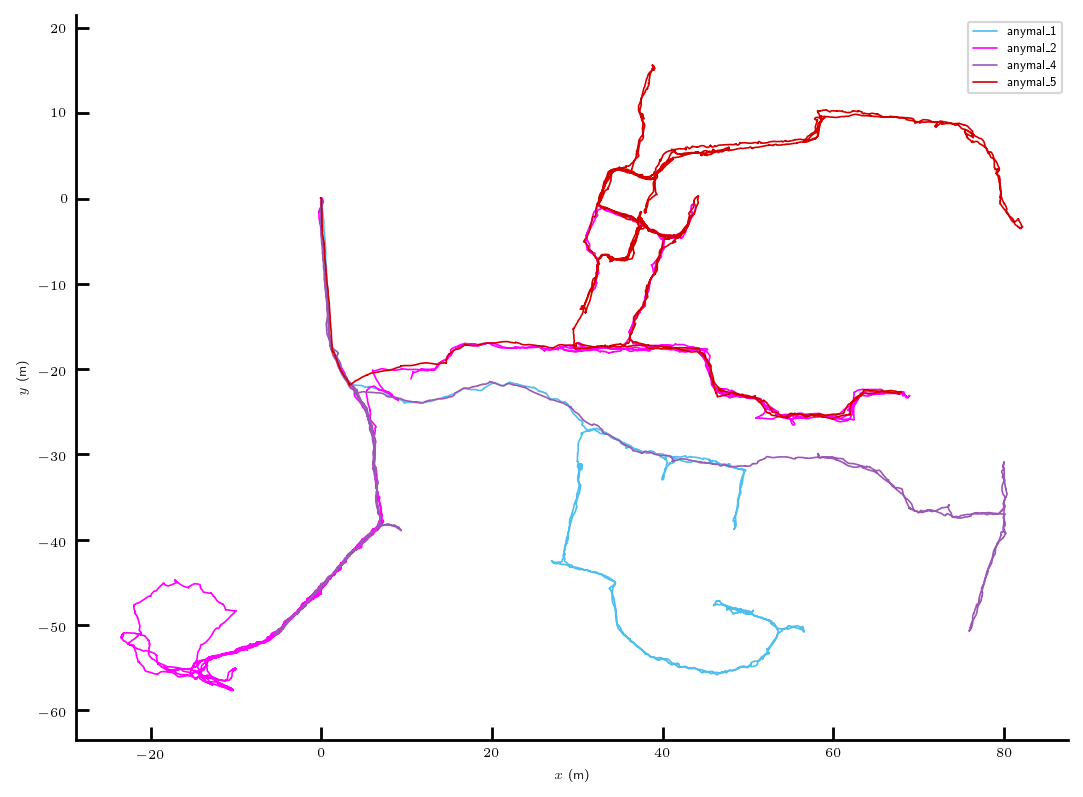

In [77]:
fig = plt.figure(figsize=(8, 6), dpi=160)
traj_by_label = {
    "anymal_1": anymal_1_traj,
    "anymal_2": anymal_2_traj,
    "anymal_4": anymal_4_traj,
    "anymal_5": anymal_5_traj
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xy)
plt.show()